In [640]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python import debug as tf_debug

In [809]:
data = pd.read_csv("/Users/gianlucatadori/Documents/Programming/kaggle_facial/training.csv")

In [ ]:
# remoe batch, convolutions

In [416]:
def plot_image(n,with_points=False):

    x = data.iloc[n]
    image = [int(i) for i in x[30].split(" ")]
    image = np.asarray(image)
    image = image.reshape([96,96])
    
    if with_points == False:
        plt.imshow(image,cmap='gray')
    else:
        fig, ax = plt.subplots()
        ax.imshow(image,cmap='gray')
        for i in range(0,(len(x)-2),2):
            ax.plot(x[i],x[i+1],color="r",marker="+")
        plt.show()



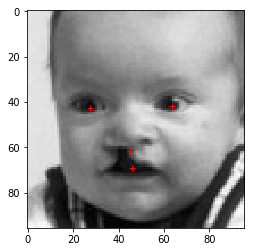

In [663]:
plot_image(2352,True)

In [671]:
z = data.dropna()
len(z)

2140

In [810]:
# create training and testing datasets

# TODO: remove all nas, and retry

def preprocess_1d(data,p):
    
    df = data.dropna()
    train_size = int(len(df)*p)
    
    labels = np.ones((len(df),30))

    for i in range(0,len(df)):
        x = np.asarray(df.iloc[i].drop(["Image"]))
        x = x.reshape([1,30])
        x = (x -48)/48
        labels[i] = labels[i]*x
    
    inputs = np.ones((len(df),9216))

    for i in range(0, len(df)):
        x = [int(j) for j in df.iloc[i][30].split(" ")]
        x = np.asarray(x).reshape([1,9216])
        x = x / 255
        inputs[i] = inputs[i] * np.asarray(x)
    
    train_x = inputs[:train_size]
    test_x = inputs[train_size:]

    train_y = labels[:train_size]
    test_y = labels[train_size:]
    
    return (train_x,train_y,test_x,test_y)




In [811]:
train_x,train_y,test_x,test_y = preprocess_1d(data,.8)

In [462]:
def create_placeholders(x,y):
    x = tf.placeholder(tf.float32,[None,9216])
    y = tf.placeholder(tf.float32,[None,30])
    
    return x,y


In [564]:
def initialize_variables(hidden_u, input_n, output_n):
    
    tf.set_random_seed(1) 
    
    w1 = tf.Variable(tf.truncated_normal((input_n,hidden_u)))
    b1 = tf.Variable(tf.zeros((1,hidden_u)))
    
    w2 = tf.Variable(tf.truncated_normal((hidden_u,output_n)))
    b2 = tf.Variable(tf.zeros((1, output_n)))
    
    parameters = {"w1":w1, "b1":b1, "w2":w2, "b2":b2}
    
    return parameters

In [710]:
def model(x,parameters):
    
    w1 = parameters["w1"]
    w2 = parameters["w2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    # first layer
    layer1 = tf.add(tf.matmul(x,w1),b1)
    layer1 = tf.nn.relu(layer1)
    # second layer
    layer2 = tf.add(tf.matmul(layer1,w2),b2)
    layer2 = tf.nn.relu(layer2)

    return layer2

In [ ]:
def conv_model(x,parameters):
    
    conv1 = tf.nn.conv2d(x,[])

In [711]:
def compute_cost(labels,pred):
    
    cost = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(labels, pred))))
    
    return cost

In [712]:
def mini_batches(batch_size):
    
    
    mini_batches = []
    m = len(train_x)
    num_complete_minibatches = math.floor(m/batch_size)
    
    for i in range(0, num_complete_minibatches):
        mini_batch_X = train_x[i * batch_size : i * batch_size + batch_size,:]
        mini_batch_Y = train_y[i * batch_size : i * batch_size + batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    if m % batch_size  != 0:
        mini_batch_X = train_x[num_complete_minibatches*batch_size:m,:]
        mini_batch_Y = train_y[num_complete_minibatches*batch_size:m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [713]:
def build_model(learn_rate,batch_size,hidden_u,epochs):
    
    input_n = 9216
    output_n = 30
    x, y = create_placeholders(train_x,train_y)
    parameters = initialize_variables(hidden_u, input_n, output_n)
    pred = model(x,parameters)
    cost = compute_cost(y,pred)
    optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    costs = []
    for epoch in range(epochs):
        
        batch_cost = 0
        avg_cost = 0.
        batches = mini_batches(batch_size)
        total_batches = len(batches)
        
        for i in range(total_batches):
            batch_x = batches[i][0]
            batch_y = batches[i][1]
            
            _,c = sess.run([optimizer,cost], feed_dict={x:batch_x,y:batch_y})
            
            batch_cost += c/total_batches
            costs.append(c)
        if epoch == 1:
            print("Cost after epoch {0}: {1}".format(epoch,batch_cost))
        elif epoch % 5 == 0:
            print("Cost after epoch {0}: {1}".format(epoch,batch_cost))
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learn_rate))
    plt.show()
            

In [715]:
model = build_model(0.01,1,900,100)

(9216, 900)
(?, 9216)
w2 shape is:(900, 30), b2:(1, 30), layer1:(?, 900)
layer2 shape is: Tensor("Relu_57:0", shape=(?, 30), dtype=float32)
Tensor("Relu_57:0", shape=(?, 30), dtype=float32)
Cost after epoch 0: 0.821070845021268
Cost after epoch 1: 0.3901555080697908
Cost after epoch 5: 0.3901555080697908


KeyboardInterrupt: 

In [754]:
from keras import backend as K
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model
#import keras as k

In [798]:
q = data.iloc[0]
image = np.asarray([int(j) for j in q[30].split(" ")])
image = image.reshape([96,96])

q2 = data.iloc[1]
image2 = np.asarray([int(j) for j in q2[30].split(" ")])
image2 = image.reshape([96,96])

x = np.asarray([])
x = np.append(image,image2)
a = np.ones((2,96,96,1))
#a[0] = image*a[0]
b = image.reshape([96,96,1])
a[0] = b*a[0]
a[0]

array([[[238.],
        [236.],
        [237.],
        ...,
        [250.],
        [250.],
        [250.]],

       [[235.],
        [238.],
        [236.],
        ...,
        [249.],
        [250.],
        [251.]],

       [[237.],
        [236.],
        [237.],
        ...,
        [251.],
        [251.],
        [250.]],

       ...,

       [[186.],
        [183.],
        [181.],
        ...,
        [ 52.],
        [ 57.],
        [ 60.]],

       [[189.],
        [188.],
        [207.],
        ...,
        [ 61.],
        [ 69.],
        [ 78.]],

       [[191.],
        [184.],
        [184.],
        ...,
        [ 70.],
        [ 75.],
        [ 90.]]])

In [814]:
len(train_y2)

428

In [818]:
df = data.dropna()
a = len(df)
print(a)

labels = np.ones((a,30))
for i in range(a):
    x = np.asarray(df.iloc[i].drop(["Image"]))
    x = x.reshape([1,30])
    x = (x -48)/48
    labels[i] = labels[i]*x
    
len(labels)

2140


2140

In [820]:
inputs = np.ones((len(df),96,96,1))

for i in range(0, len(df)):
    x = [int(j) for j in df.iloc[i][30].split(" ")]
    x = np.asarray(x).reshape([96,96,1])
    x = x / 255
    inputs[i] = inputs[i] * x
len(inputs)

2140

In [821]:
train_size = int(len(df)*.8)
train_x = inputs[:train_size]
test_x = inputs[train_size:]

train_y = labels[:train_size]
test_y = labels[train_size:]

In [827]:
len(train_y)

1712

In [828]:
# create training and testing datasets

# TODO: remove all nas, and retry

def preprocess_2d(data,p):
    
    df = data.dropna()
    train_size = int(len(df)*p)
    
    labels = np.ones((len(df),30))

    for i in range(0,len(df)):
        x = np.asarray(df.iloc[i].drop(["Image"]))
        x = x.reshape([1,30])
        x = (x -48)/48
        labels[i] = labels[i]*x
    
    inputs = np.ones((len(df),96,96,1))

    for i in range(0, len(df)):
        x = [int(j) for j in df.iloc[i][30].split(" ")]
        x = np.asarray(x).reshape([96,96,1])
        x = x / 255
        inputs[i] = inputs[i] * x
    
    train_x = inputs[:train_size]
    test_x = inputs[train_size:]

    train_y = labels[:train_size]
    test_y = labels[train_size:]
    
    return (train_x,train_y,test_x,test_y)

In [829]:
train_x2, train_y2, test_x2, test_y2 = preprocess_2d(data,.8)

In [830]:
def conv_model(in_shape):
    
    x = Input(in_shape)
    
    conv1 = Conv2D(32,(3,3),strides=(1,1),padding="same")(x)
    conv1 = Activation("relu")(conv1)
    conv1 = MaxPooling2D((2,2))(conv1)
    
    conv2 = Conv2D(64,(3,3),strides=(1,1),padding="same")(conv1)
    conv2 = Activation("relu")(conv2)
    conv2 = MaxPooling2D((2,2))(conv2)
    
    conv3 = Conv2D(64,(3,3),strides=(1,1),padding="same")(conv2)
    conv3 = Activation("relu")(conv3)
    conv3 = MaxPooling2D((2,2))(conv3)
    
    flat = Flatten()(conv3)
    out = Dense(30,activation="relu")(flat)
    
    model = Model(inputs= x, outputs = out)
    
    return model

In [831]:
def rmse(y_pred,y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [832]:
model = conv_model((96,96,1))
model.compile(optimizer="adam", loss=rmse,metrics=["accuracy"])


In [833]:
model.fit(x=train_x2, y=train_y2,epochs=2,batch_size=128)

Epoch 1/2
1712/1712 [==============================] - 55s 32ms/step - loss: 0.3239 - acc: 0.1215
Epoch 2/2
1712/1712 [==============================] - 31s 18ms/step - loss: 0.3122 - acc: 0.1706
